<h1 style="text-align: center;"> Lending Club Borrower Determination </h1>

<img style="display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;"
     src="images/loan_img.jpg" />

#### Author: Tahron Herring

## Overview

<p style="text-align: left;"> 
Lending Club, one of the world's largest peer-to-peer lending companies, is looking for ways to improve its loan approval process.  Specifically, the focus for this project will be to improve the borrower selection portion of the process by using machine learning models to better identify those borrowers who are more likely to repay their loans in full.
</p>

## Business Understanding

<p style="text-align: left;"> 
Determining which customers to lend financial resources to is key to the Lending Club's business. Our team has been tasked with using current data on Lending Club borrowers to accurately predict whether a new borrower will pay their loan in full.  We will also be providing a list of customer focus areas that are key to accurately predicting customer outcomes.
</p>

## Data Understanding

<p style="text-align: left;"> 
The Lending Club dataset is a large dataset with a great deal of information about borrowers and their loan statuses. The dataset contains hundreds of thousands to millions of records distributed across over 150 features.  For the purposes of this project, we will only be using roughly 50,000 records and selecting the most influential 30 or so features. After preparing our data for modeling we'll then use three different models on our dataset. The model with the best performance will be used to make recommendations to our client, the Lending Club.
</p>

## Data Preperation & Analysis

<p style="text-align: left;"> 
To begin preping our data we'll first import the pandas library, load the full Lending Club dataset, and carve out an initial set of features that will be further pared down before we begin modeling.
</p>

In [1]:
import pandas as pd

In [2]:
#Set path for original LC dataset
file_path = 'Loan_status_2007-2020Q3.gzip'

In [3]:
#Load in LC dataset
loans = pd.read_csv(file_path, nrows=50000, low_memory=False, index_col=0)
loans.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


<p style="text-align: left;"> 
Now that the full dataset is loaded we can get a better sense of the features in order to determine which ones will be retained.
</p>

In [4]:
#Explore dataset features
loans.info(max_cols=141)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 7463
Data columns (total 141 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          50000 non-null  object 
 1   loan_amnt                                   49999 non-null  float64
 2   funded_amnt                                 49999 non-null  float64
 3   funded_amnt_inv                             49999 non-null  float64
 4   term                                        49999 non-null  object 
 5   int_rate                                    49999 non-null  object 
 6   installment                                 49999 non-null  float64
 7   grade                                       49999 non-null  object 
 8   sub_grade                                   49999 non-null  object 
 9   emp_title                                   46913 non-null  object 
 10  emp_length

<p style="text-align: left;"> 
After exploring the dataset features we notice that the first fifty or so contain the least amount of NaNs so that will be our starting point.  Also because the goal of our project is to predict which borrowers will mostlikely fully repay their loan, we'll use the 'loan_status' feature as our target.
</p>

In [5]:
#Subsetting the original LC dataset
alt_loans = loans.copy()
alt_loans = alt_loans.iloc[:, :51]

In [6]:
#Exploring the target feature
alt_loans['loan_status'].value_counts()

Fully Paid                                             40414
Charged Off                                             6836
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

<p style="text-align: left;"> 
In our target feature there are two version of each possible loan status.  We'll merge both version of each value so that we only have 'Full Paid' or 'Charged Off' as loan statuses. But first we'll address our NaN values in our features and further pare our features list down. 
</p>

In [7]:
#Checking NaN counts
alt_loans.isna().sum()

id                             0
loan_amnt                      1
funded_amnt                    1
funded_amnt_inv                1
term                           1
int_rate                       1
installment                    1
grade                          1
sub_grade                      1
emp_title                   3087
emp_length                  1441
home_ownership                 1
annual_inc                     5
verification_status            1
issue_d                        1
loan_status                    1
pymnt_plan                     1
url                            1
purpose                        1
title                         14
zip_code                       1
addr_state                     1
dti                            1
delinq_2yrs                   30
earliest_cr_line              30
fico_range_low                 1
fico_range_high                1
inq_last_6mths                30
mths_since_last_delinq     30824
mths_since_last_record     45294
open_acc  

<p style="text-align: left;"> 
After reviewing the NaN counts for our features and consulting the data dictionary there are a number of features that can be removed from the dataset. 
</p>

In [8]:
#Droping selected features from dataset
alt_loans.drop(axis=0, columns=['next_pymnt_d', 'id', 'last_credit_pull_d',
                                'last_pymnt_d', 'collection_recovery_fee',
                                'recoveries', 'total_pymnt_inv', 'total_rec_prncp',
                                'total_rec_int', 'total_rec_late_fee', 'initial_list_status',
                                'out_prncp', 'out_prncp_inv', 'verification_status',
                                'url', 'delinq_2yrs', 'earliest_cr_line', 'last_fico_range_high',
                                'last_fico_range_low', 'issue_d', 'emp_title', 'title'], inplace=True)

<p style="text-align: left;"> 
The first feature that we will address NaNs for will be 'emp_length' because there are 1,441 NaNs for this field.  Two of the values for this feature will need to be altered as well due to certain models having issues with some of the symbols in the values. The '+' in '10+ years' and the '<' in '< 1 year' can cause errors when modeling.
</p>

In [9]:
#Exploring 'emp_length' values
alt_loans['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
#Addressing 'emp_length' NaN values
alt_loans['emp_length'].fillna(value='Not Applicable', axis=0, inplace=True)

In [11]:
#Addressing 'emp_length' '+' symbol in values
alt_loans['emp_length'].replace(to_replace='10+ years', value='gt10 years', inplace=True)

In [12]:
#Addressing 'emp_length' '<' symbol in values
alt_loans['emp_length'].replace(to_replace='< 1 year', value='lt1 year', inplace=True)

In [13]:
#Verifying 'emp_length' changes
alt_loans['emp_length'].unique()

array(['gt10 years', 'lt1 year', '1 year', '3 years', '8 years',
       '9 years', '4 years', '5 years', '6 years', '2 years', '7 years',
       'Not Applicable'], dtype=object)

<p style="text-align: left;"> 
The next feature that we will address NaNs for will be 'inq_last_6mths' of which there are 30 NaN values. Consulting the data dictionary 'inq_last_6mths' represents inquiries made in the last 6 months.  Using this information an acceptable NaN replacement value would be to use the mean for this field.
</p> 

In [14]:
#Exploring 'inq_last_6mths' values
alt_loans['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8., nan,  9., 10., 11.,
       12., 15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25.,
       27., 20., 19.])

In [15]:
#Addressing 'inq_last_6mths' NaN values
repl_val = round(alt_loans['inq_last_6mths'].mean())
alt_loans['inq_last_6mths'].fillna(value=repl_val, axis=0, inplace=True)

In [16]:
#Verifying 'inq_last_6mths' changes
alt_loans['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

<p style="text-align: left;"> 
The features 'mths_since_last_delinq'(30,824 NaNs) and 'mths_since_last_record'(45,294 NaNs) represent the months since last delinquency and the months since last public record was made. Using this information an acceptable NaN replacement value would be to use the means for these fields. 
</p>

In [17]:
#Exploring 'mths_since_last_delinq' values
alt_loans['mths_since_last_delinq'].unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.])

In [18]:
#Addressing 'mths_since_last_delinq' NaN values
repl_val = round(alt_loans['mths_since_last_delinq'].mean())
alt_loans['mths_since_last_delinq'].fillna(value=repl_val, axis=0, inplace=True)

In [19]:
#Verifying 'mths_since_last_delinq' changes
alt_loans['mths_since_last_delinq'].unique()

array([ 35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,  40.,
        74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,  24.,
        16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,  22.,
        59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,  70.,
        29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,   4.,
        43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,  72.,
        42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,  66.,
        32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103., 120.,
       106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.])

In [20]:
#Exploring 'mths_since_last_record' values
alt_loans['mths_since_last_record'].unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.,  24.,  15.,  84.,  10.,  16.,   8.,   9.,   3., 121.])

In [21]:
#Addressing 'mths_since_last_record' NaN values
repl_val = round(alt_loans['mths_since_last_record'].mean())
alt_loans['mths_since_last_record'].fillna(value=repl_val, axis=0, inplace=True)

In [22]:
#Verifying 'mths_since_last_record' changes
alt_loans['mths_since_last_record'].unique()

array([ 63., 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  94., 109.,  99.,
       104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,  44.,
        80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,  64.,
        50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,  73.,
        11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,  30.,
        41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,  13.,
        48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120., 129.,
         5.,  24.,  15.,  84.,  10.,  16.,   8.,   9.,   3., 121.])

<p style="text-align: left;"> 
The next two features to address are 'open_acc'(30 NaNs) and 'pub_rec'(30 NaNs). They  represent the number of open credit lines and the number of derogatory public records. Using this information an acceptable NaN replacement value would be to use the means for these fields.
</p>

In [23]:
#Exploring 'open_acc' values
alt_loans['open_acc'].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42., nan,  1., 46., 37., 47., 40.])

In [24]:
#Addressing 'open_acc' NaN values
repl_val = round(alt_loans['open_acc'].mean())
alt_loans['open_acc'].fillna(value=repl_val, axis=0, inplace=True)

In [25]:
#Verifying 'open_acc' changes
alt_loans['open_acc'].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., 40.])

In [26]:
#Exploring 'pub_rec' values
alt_loans['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4., nan,  5.,  6.,  9.,  8.,  7.])

In [27]:
#Addressing 'pub_rec' NaN values
repl_val = round(alt_loans['pub_rec'].mean())
alt_loans['pub_rec'].fillna(value=repl_val, axis=0, inplace=True)

In [28]:
#Verifying 'pub_rec' changes
alt_loans['pub_rec'].unique()

array([0., 1., 2., 3., 4., 5., 6., 9., 8., 7.])

<p style="text-align: left;"> 
'revol_util'(95 NaNs) and 'total_acc'(30 NaNs) are the next two features to address. They represent the revolving utilization rate and the total number of credit lines. Using this information an acceptable NaN replacement value would be to use the mean for 'total_acc' and a dummy value for 'revol_util'.
</p>

In [29]:
#Exploring 'revol_util' values
alt_loans['revol_util'].unique()

array(['83.7%', '9.4%', '98.5%', ..., '101%', '100.3%', '101.3%'],
      dtype=object)

In [30]:
#Addressing 'revol_util' NaN values
alt_loans['revol_util'].fillna(value='99999.999%', axis=0, inplace=True)

In [31]:
#Verifying 'revol_util' changes
alt_loans['revol_util'].unique()

array(['83.7%', '9.4%', '98.5%', ..., '101%', '100.3%', '101.3%'],
      dtype=object)

In [32]:
#Exploring 'total_acc' values
alt_loans['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,  nan,   1., 105.])

In [33]:
#Addressing 'total_acc' NaN values
repl_val = round(alt_loans['total_acc'].mean())
alt_loans['total_acc'].fillna(value=repl_val, axis=0, inplace=True)

In [34]:
#Verifying 'total_acc' changes
alt_loans['total_acc'].unique()

array([  9.,   4.,  10.,  37.,  38.,  12.,  11.,  13.,   3.,  23.,  34.,
        29.,  28.,  42.,  14.,  22.,  21.,  17.,   7.,  31.,  44.,  26.,
        16.,   6.,  18.,  27.,  24.,  25.,  40.,  35.,   8.,  20.,  15.,
        19.,  36.,  51.,  32.,  30.,  33.,  46.,   5.,  61.,  56.,  50.,
        41.,  39.,  79.,  62.,  43.,  47.,  53.,  45.,  60.,  55.,  52.,
        58.,  54.,  57.,  49.,  63.,  48.,  59.,  77.,  87.,  75.,  72.,
        64.,  67.,  78.,  76.,  74.,  66.,  81.,  90.,  80.,  71.,  69.,
        73.,  70.,  68.,  65.,   2.,   1., 105.])

<p style="text-align: left;"> 
Now that we have an acceptable feature list and the NaN count should be low enough to drop the offending rows.
</p>

In [35]:
#Reverifying NaN counts
alt_loans.isna().sum()

loan_amnt                 1
funded_amnt               1
funded_amnt_inv           1
term                      1
int_rate                  1
installment               1
grade                     1
sub_grade                 1
emp_length                0
home_ownership            1
annual_inc                5
loan_status               1
pymnt_plan                1
purpose                   1
zip_code                  1
addr_state                1
dti                       1
fico_range_low            1
fico_range_high           1
inq_last_6mths            0
mths_since_last_delinq    0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 1
revol_util                0
total_acc                 0
total_pymnt               1
last_pymnt_amnt           1
dtype: int64

In [36]:
#Drop records with NaNs
alt_loans.dropna(inplace=True)

In [37]:
#Verifying feature changes
alt_loans.isna().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
loan_status               0
pymnt_plan                0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
fico_range_low            0
fico_range_high           0
inq_last_6mths            0
mths_since_last_delinq    0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
total_pymnt               0
last_pymnt_amnt           0
dtype: int64

<p style="text-align: left;"> 
With no NaN values in our features it is time to turn our attention to preping our target variable. There are two variants of the loan status values 'Fully Paid' and 'Charged Off' that need to be merged.
</p>

In [38]:
#Merging 'loan_status' values
ls = [] 
for x in alt_loans['loan_status']:
    if x == 'Does not meet the credit policy. Status:Fully Paid':
        ls.append('Fully Paid')
    elif x == 'Fully Paid':
        ls.append('Fully Paid')
    elif x == 'Does not meet the credit policy. Status:Charged Off':
        ls.append('Charged Off')
    elif x == 'Charged Off':
        ls.append('Charged Off')

alt_loans['loan_status'] = ls

In [39]:
#Verifying 'loan_status' values
alt_loans['loan_status'].value_counts()

Fully Paid     42398
Charged Off     7597
Name: loan_status, dtype: int64

<p style="text-align: left;"> 
The last step in our preprocessing is to address our categorical and numerical features so that the machine learning models can run properly.
</p>

In [40]:
#Exploring the categorical and numerical features
cats = []
nums = []
for x in alt_loans.columns:
    if alt_loans[x].dtype == 'object':
        cats.append(x)
        
for x in alt_loans.columns:
    if alt_loans[x].dtype != 'object':
        nums.append(x)        
display(cats)
display(nums)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'zip_code',
 'addr_state',
 'revol_util']

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'annual_inc',
 'dti',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'last_pymnt_amnt']

<p style="text-align: left;"> 
In order for our machine learning models to work we mush one-hot encode our categorical variables. However, before one-hot encoding our categorical features we must ensure that those features do not have too many unique values or the one-hot encoder could encounter issues. The first of these featues that we will address will be 'int_rate' given that it has 419 unique values.
</p>

In [41]:
#Exploring the value totals for categorical features
for x in range(0, len(cats)):
    print(cats[x], alt_loans[cats[x]].value_counts().count())

term 2
int_rate 419
grade 7
sub_grade 35
emp_length 12
home_ownership 5
loan_status 2
pymnt_plan 1
purpose 14
zip_code 849
addr_state 50
revol_util 1131


In [42]:
#Exploring 'int_rate' values
alt_loans['int_rate']

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
         ...   
7459     14.47%
7460     15.61%
7461     13.98%
7462     10.99%
7463     17.57%
Name: int_rate, Length: 49995, dtype: object

<p style="text-align: left;"> 
Upon closer inspection the field 'int_rate' appears to actually be numerical.  Therefore, stripping the % character and converting to a float should be sufficient given that this feature represents an interest rate.
</p>

In [43]:
#Addressing 'int_rate' values
alt_loans['int_rate'] = [float(x.strip('%')) for x in alt_loans['int_rate']]

In [44]:
#Verifying 'int_rate' changes
alt_loans['int_rate']

0       10.65
1       15.27
2       15.96
3       13.49
4       12.69
        ...  
7459    14.47
7460    15.61
7461    13.98
7462    10.99
7463    17.57
Name: int_rate, Length: 49995, dtype: float64

<p style="text-align: left;"> 
The next field to address is 'sub_grade' with its 35 different values. The values are two character strings so the best course of action here may be to encode each value to a number between 1 and 35, which would make the feature numerical.
</p>

In [45]:
#Exploring 'sub_grade' values
alt_loans['sub_grade']

0       B2
1       C4
2       C5
3       C1
4       B5
        ..
7459    C2
7460    C4
7461    C1
7462    B2
7463    D2
Name: sub_grade, Length: 49995, dtype: object

In [46]:
#Addressing 'sub_grade' values
sgrades = list(alt_loans['sub_grade'].values)
sg_val = list(alt_loans['sub_grade'].unique())

sg_dict = {}
for x, y in enumerate(sg_val):
    sg_dict.update({y:x})

sgrades_trans = []
for s in sgrades:
    for k in sg_dict.keys():
        if s == k:
            sgrades_trans.append(sg_dict[k])
            
    
alt_loans['sub_grade'] = sgrades_trans

In [47]:
#Verifying 'sub_grade' changes
alt_loans['sub_grade']

0        0
1        1
2        2
3        3
4        4
        ..
7459    14
7460     1
7461     3
7462     0
7463    15
Name: sub_grade, Length: 49995, dtype: int64

<p style="text-align: left;"> 
After 'sub_grade' we'll work on 'zip_code'.  Currently this field is setup as a string containing three numeric digits and two 'x' placeholders to form the five digit zip.  For our purposes we'll strip the placeholders and  use a three digit zip. 
</p>

In [48]:
#Exploring 'zip_code' values
alt_loans['zip_code']

0       860xx
1       309xx
2       606xx
3       917xx
4       972xx
        ...  
7459    601xx
7460    535xx
7461    254xx
7462    911xx
7463    770xx
Name: zip_code, Length: 49995, dtype: object

In [49]:
#Addressing 'zip_code' values
alt_loans['zip_code'] = [int(x.strip('x')) for x in alt_loans['zip_code']]

In [50]:
#Verifying 'zip_code' changes
alt_loans['zip_code']

0       860
1       309
2       606
3       917
4       972
       ... 
7459    601
7460    535
7461    254
7462    911
7463    770
Name: zip_code, Length: 49995, dtype: int64

<p style="text-align: left;"> 
The field 'addr_state' has 50 different values. The values are two character strings so as we did with 'sub_grade', the best course of action here may be to encode each value to a number between 1 and 50. This would also make the feature numerical.
</p>

In [51]:
#Exploring 'addr_state' values
alt_loans['addr_state']

0       AZ
1       GA
2       IL
3       CA
4       OR
        ..
7459    IL
7460    WI
7461    WV
7462    CA
7463    TX
Name: addr_state, Length: 49995, dtype: object

In [52]:
#Addressing 'addr_state' values
states = list(alt_loans['addr_state'].values)
st_val = list(alt_loans['addr_state'].unique())

st_dict = {}
for x, y in enumerate(st_val):
    st_dict.update({y:x})

states_trans = []
for s in states:
    for k in st_dict.keys():
        if s == k:
            states_trans.append(st_dict[k])

alt_loans['addr_state'] = states_trans

In [53]:
#Verifying 'addr_state' changes
alt_loans['addr_state']

0        0
1        1
2        2
3        3
4        4
        ..
7459     2
7460    23
7461    30
7462     3
7463     6
Name: addr_state, Length: 49995, dtype: int64

<p style="text-align: left;"> 
The last field to address will be 'revol_util'.  We'll use the same approach for this field as we used for the interest rate field by stripping the % character and coverting to a float.
</p>

In [54]:
#Exploring 'revol_util' values
alt_loans['revol_util']

0       83.7%
1        9.4%
2       98.5%
3         21%
4       53.9%
        ...  
7459    51.7%
7460      87%
7461    72.4%
7462      33%
7463    97.3%
Name: revol_util, Length: 49995, dtype: object

In [55]:
#Addressing 'revol_util' values
alt_loans['revol_util'] = [float(x.strip('%')) for x in alt_loans['revol_util']]

In [56]:
#Verifying 'revol_util' changes
alt_loans['revol_util']

0       83.7
1        9.4
2       98.5
3       21.0
4       53.9
        ... 
7459    51.7
7460    87.0
7461    72.4
7462    33.0
7463    97.3
Name: revol_util, Length: 49995, dtype: float64

<p style="text-align: left;"> 
After addressing our categorical features we will recheck what features now fall into which categories.
</p>

In [57]:
#Exploring the categorical and numerical features
cats_2 = []
nums_2 = []
for x in alt_loans.columns:
    if alt_loans[x].dtype == 'object':
        cats_2.append(x)
        
for x in alt_loans.columns:
    if alt_loans[x].dtype != 'object':
        nums_2.append(x)        
display(cats_2)
display(nums_2)

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'loan_status',
 'pymnt_plan',
 'purpose']

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'sub_grade',
 'annual_inc',
 'zip_code',
 'addr_state',
 'dti',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'last_pymnt_amnt']

<p style="text-align: left;"> 
As a final check we'll ensure that our categorical features all have acceptable value counts.
</p>

In [58]:
#Exploring the value totals for categorical features
for x in range(0, len(cats_2)):
    print(cats_2[x], alt_loans[cats_2[x]].value_counts().count())

term 2
grade 7
emp_length 12
home_ownership 5
loan_status 2
pymnt_plan 1
purpose 14


### Exploratory Data Analysis

<p style="text-align: left;"> 
Now that our dataset is in a better state and we have a good amount of impactful features we can begin looking at the relationship among these features.  To begin we'll look at the distribution of values in our target feature.
</p>

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

<AxesSubplot:>

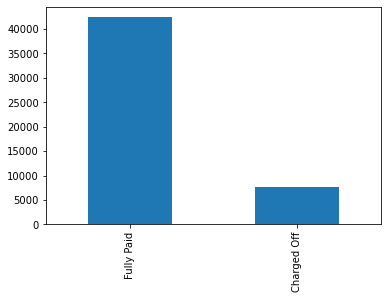

In [60]:
#Exploring target distribution
alt_loans.loan_status.value_counts().plot.bar()

<p style="text-align: left;"> 
As we expect, most borrowers pay their loans thus the imbalance in the numbers. Next we'll explore some of the relationships with our target and the predictor features.
</p>

In [61]:
#Encoding target feature
alt_loans1 = alt_loans.copy()
lb_enc = LabelEncoder()
alt_loans1['loan_status'] = pd.Series(lb_enc.fit_transform(alt_loans1['loan_status']))

In [62]:
#Verifying target encoding
alt_loans1['loan_status']

0       1
1       0
2       1
3       1
4       1
       ..
7459    1
7460    1
7461    0
7462    0
7463    1
Name: loan_status, Length: 49995, dtype: int32

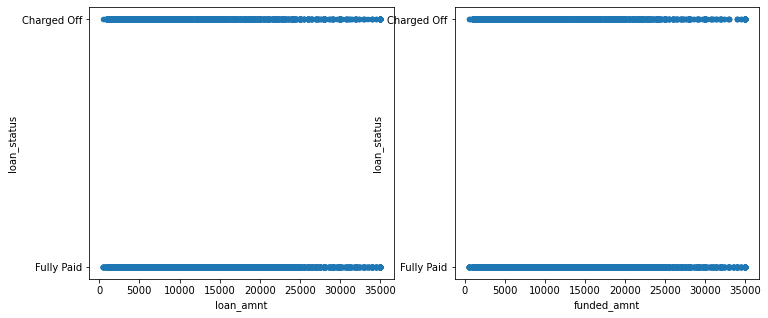

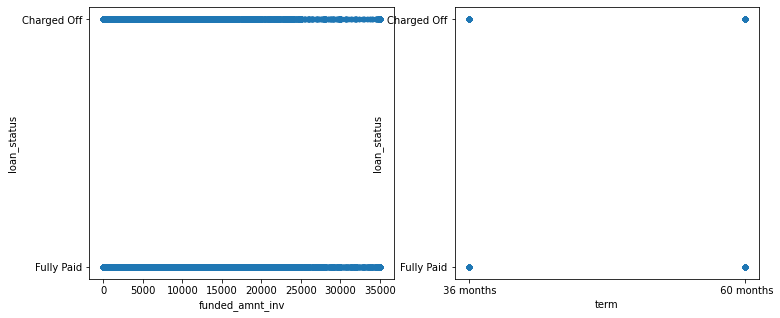

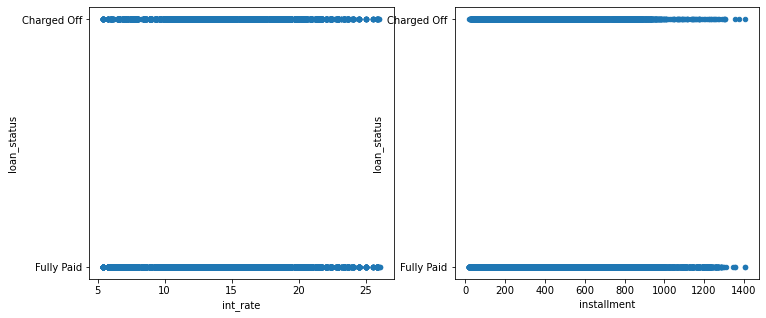

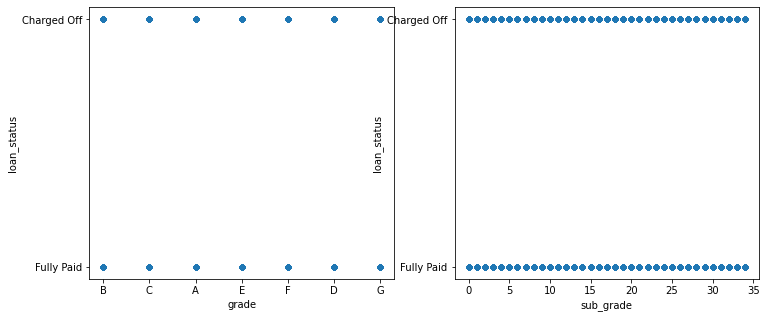

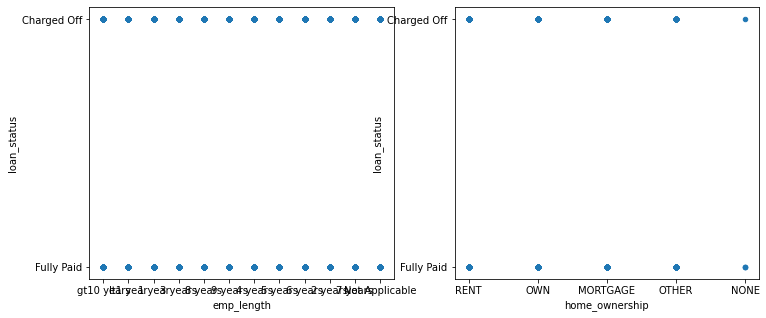

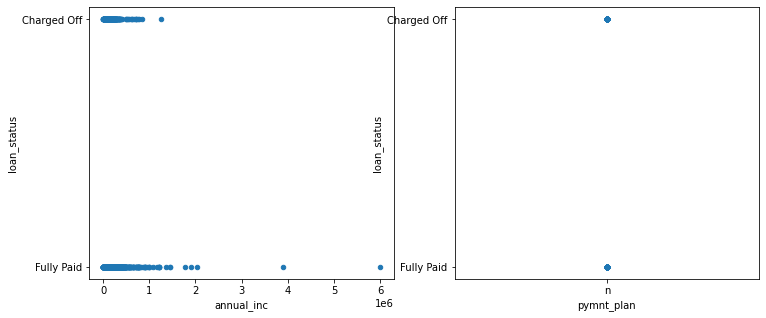

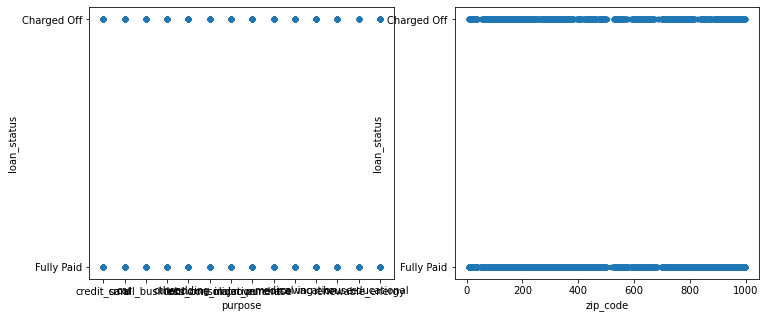

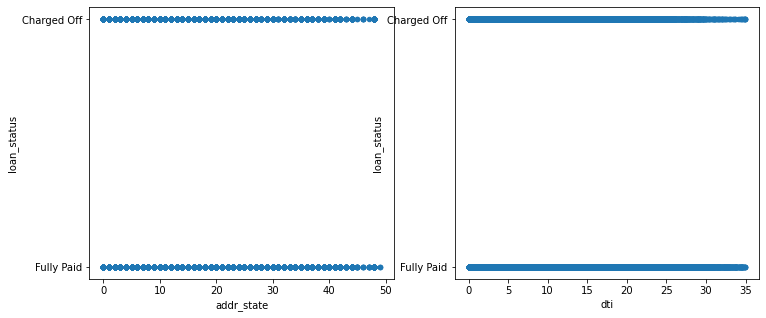

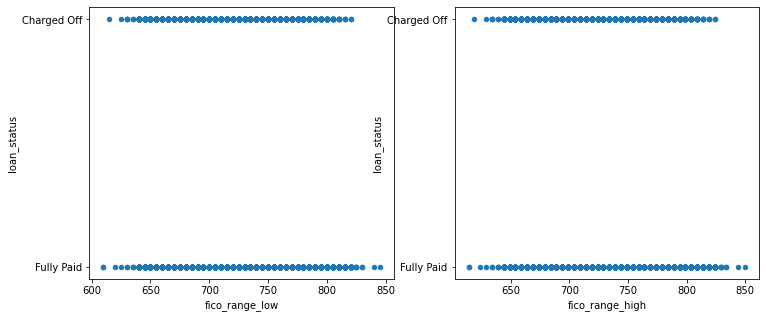

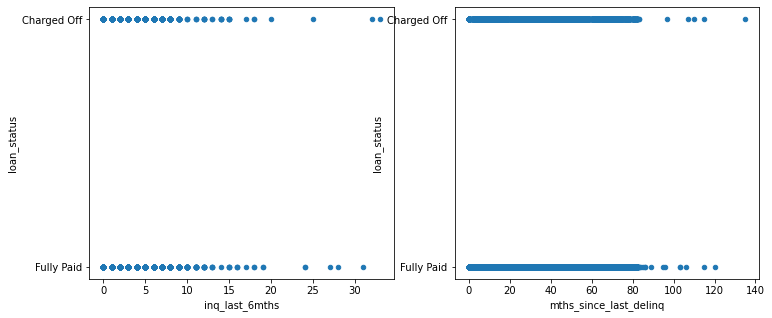

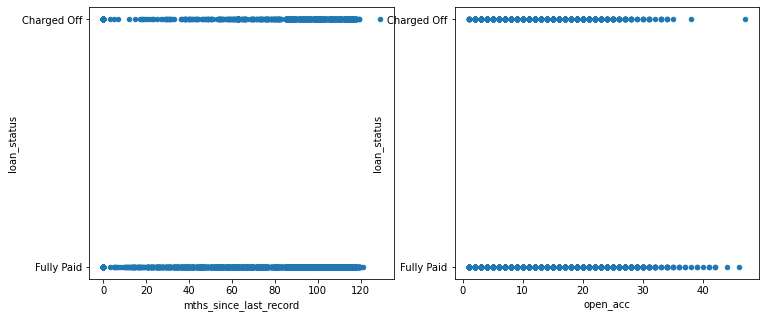

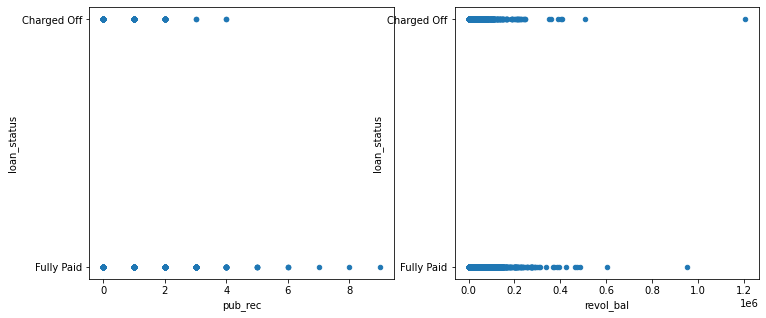

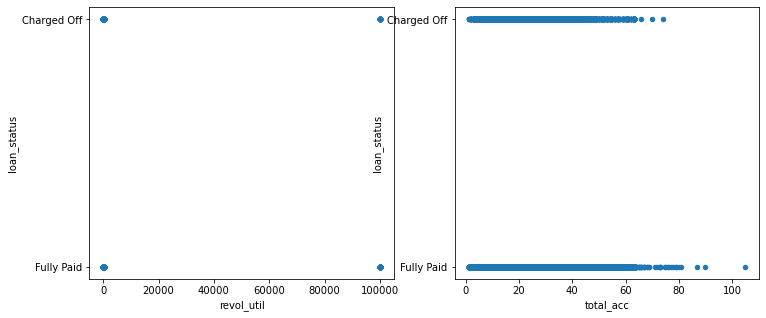

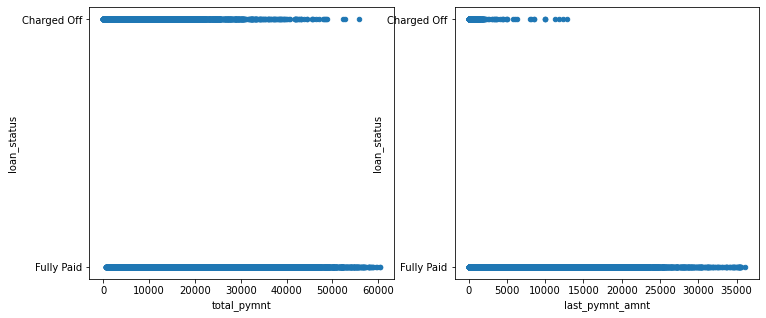

In [63]:
#Ploting features vs target
cols = alt_loans1.columns.drop(['loan_status'])

for i in range(0, 28, 2):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

        alt_loans.plot.scatter(x=cols[i], y='loan_status', ax=ax1)
        alt_loans.plot.scatter(x=cols[i+1], y='loan_status', ax=ax2);

<p style="text-align: left;"> 
Most features seem to be behaving as expected at this point.  For example, looking at the 'last payment amount' variable we expect those who don't pay off their loans to have paid smaller amounts or nothing for their last payment, which could be linked to financial hardship of some kind.
</p>

In [64]:
#Correlating target with numerical features
corr_results = abs(alt_loans1.corr()['loan_status'])
corr_results.sort_values(ascending=False)

loan_status               1.000000
total_pymnt               0.178364
int_rate                  0.161373
last_pymnt_amnt           0.158429
fico_range_low            0.119461
fico_range_high           0.119461
inq_last_6mths            0.081751
sub_grade                 0.062637
pub_rec                   0.037050
loan_amnt                 0.033521
dti                       0.033134
funded_amnt               0.031388
annual_inc                0.030614
revol_bal                 0.018226
revol_util                0.017893
installment               0.015802
total_acc                 0.014524
zip_code                  0.011777
mths_since_last_record    0.011290
funded_amnt_inv           0.010090
mths_since_last_delinq    0.007535
addr_state                0.003700
open_acc                  0.001232
Name: loan_status, dtype: float64

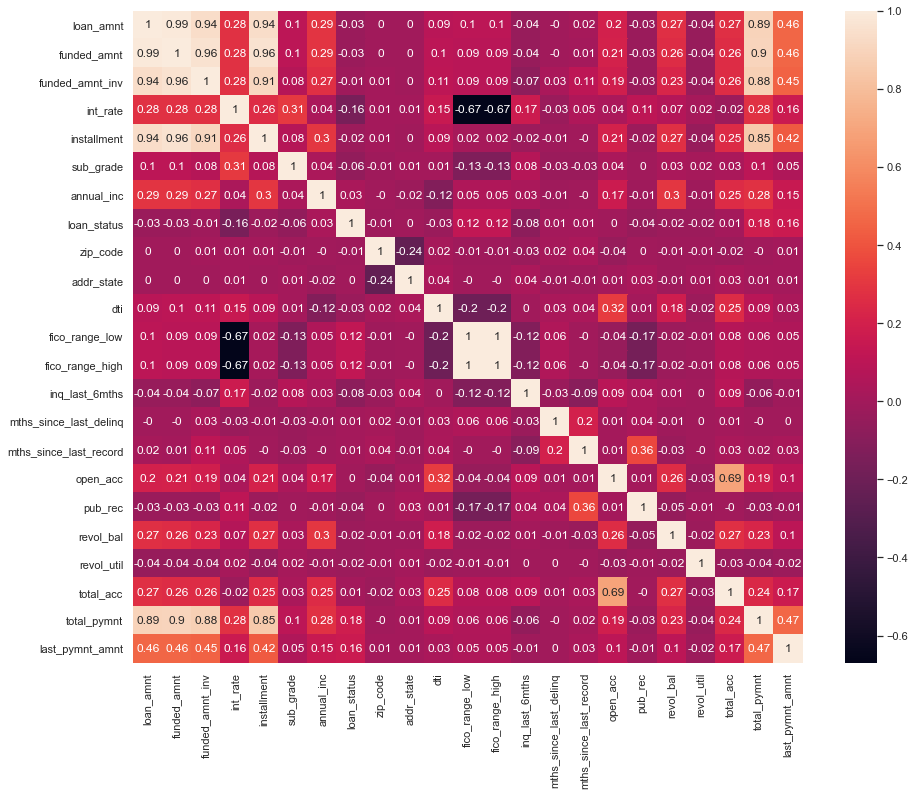

In [65]:
#Heatmap of target and numerical features
data = round(alt_loans1.corr(), 2)
sns.set(rc = {'figure.figsize':(15,12)})
sns.heatmap(data, annot=True);

In [66]:
#list of target and top ten correlated features
pp_vars = corr_results.sort_values(ascending=False)[:11].index
list(pp_vars)

['loan_status',
 'total_pymnt',
 'int_rate',
 'last_pymnt_amnt',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'sub_grade',
 'pub_rec',
 'loan_amnt',
 'dti']

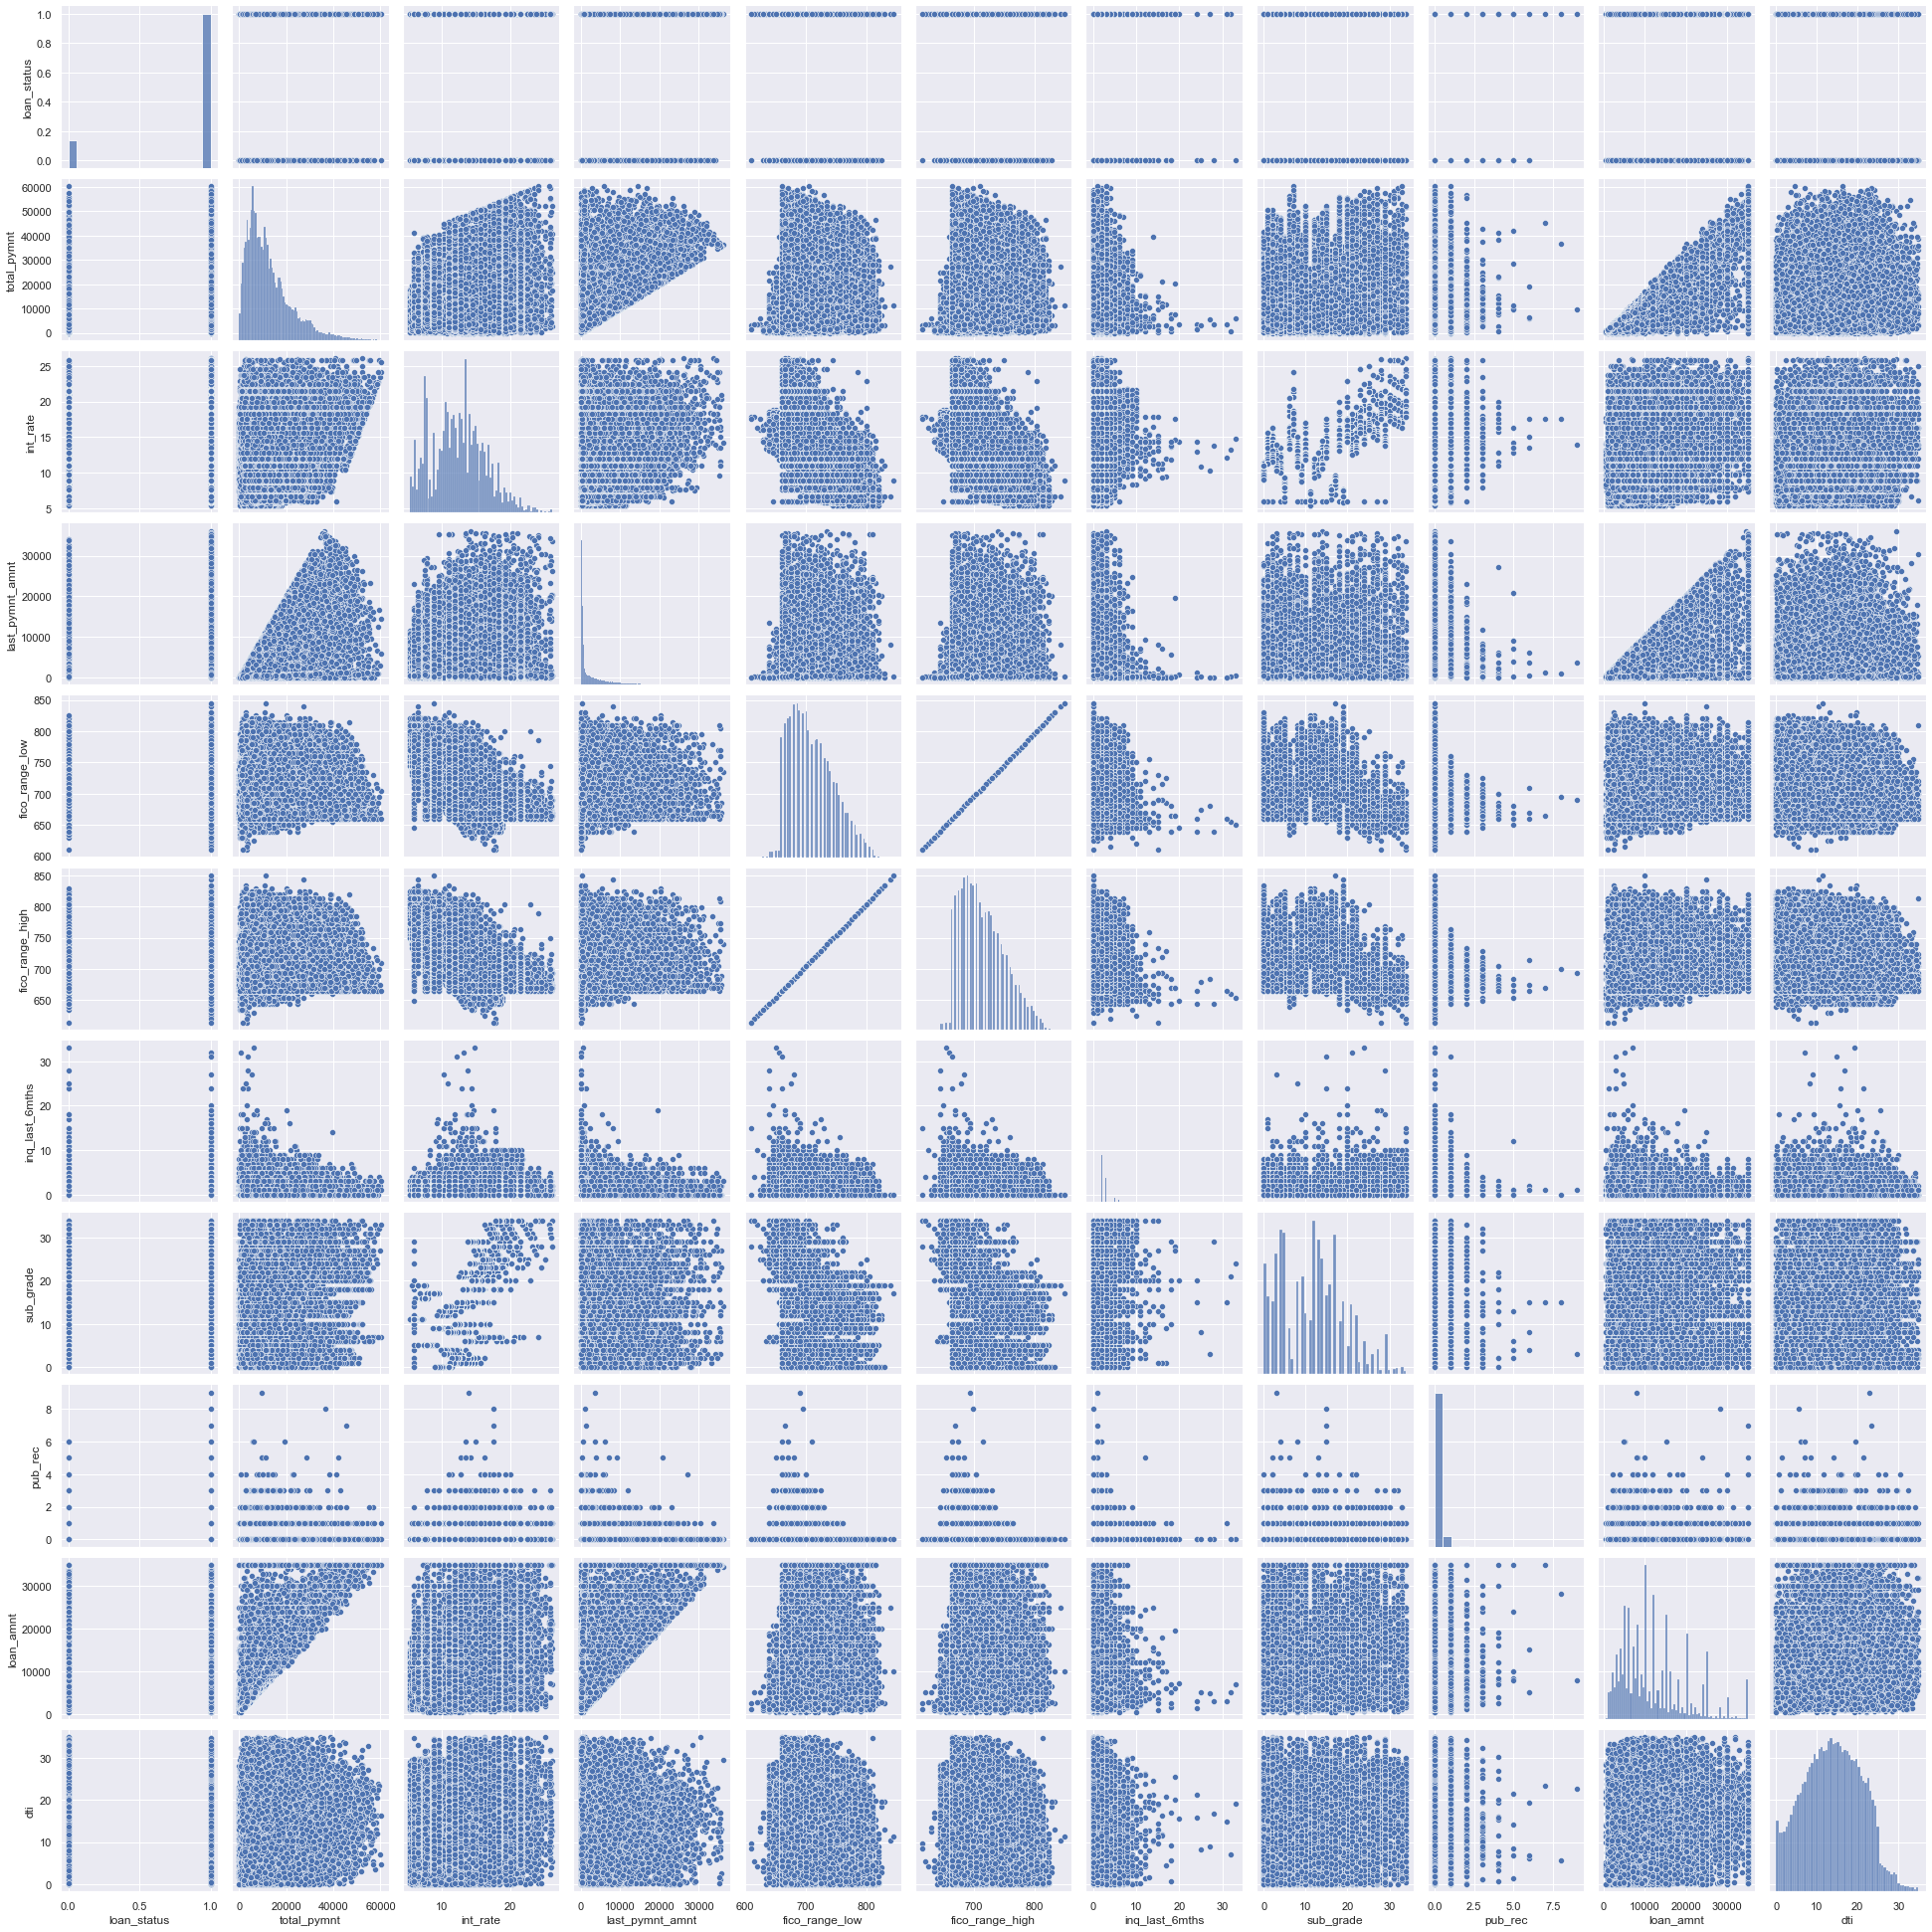

In [67]:
#Pair plot of target and top ten correlated features
sns.pairplot(alt_loans1, vars=['loan_status', 'total_pymnt', 'int_rate', \
                               'last_pymnt_amnt', 'fico_range_low', 'fico_range_high', \
                               'inq_last_6mths', 'sub_grade', 'pub_rec', 'loan_amnt', 'dti']);

<p style="text-align: left;"> 
After exploring the relationships between our numerical features and our target, there are some features that are more highly correlated than others.  Amoung those features the two variables, low fico range and high fico range seem to be the only two with a true linear relationship that may impact results to a degree.  However, we believe that the impact would be minimal given the number of other features that will be used by our models.
</p>

<p style="text-align: left;"> 
Since we are done with our data preperation and our notebook is getting quite long, we'll save the altered version of the Lending Club dataset and use that for modeling in another notebook.
</p>

In [68]:
#Saving updated dataset
alt_loans.to_csv('C:/Users/russd/Documents/Flatiron/Phase_3/Lending_Club_Loan_Processing/data/alt_loans.csv')

### Data Preperation & Analysis Summary

<p style="text-align: left;"> 
In summary, to prep our dataset we performed the following tasks:
<ol>
<li>Examined the dataset: Looked at the raw dataset and set out a plan to pare it down to a manageable level</li>
<li>Subsetted the features: Using the new information about the dataset we selected a group of features for our project</li>
<li>Deleted unneeded features: Consulting the data dictionary and examining the features in more depth, we dropped unneeded fields</li>
<li>Replaced NaNs and/or encoded feature values: Once we had our working feature group we worked on preparing their values </li>
<li>Adjusted target feature values: After predictor values were handled, target values were addressed</li>
<li>Encoded and/or transformed categorical feature values: As a last preparation step categorical features were addressed further</li>
<li>Performed Exploratory Data Analysis: Once all feature were prepared and brought to an acceptable level the relationships among them were explored</li>    
<li>Saved altered dataset: Lastly the subsetted and prepared dataset was saved for modeling activities</li>
</ol>
    
</p>